# Working with video and camera

## How to use raspberry pi camera via opencv

If you have problem connecting your camera, see `Setup PiCamera access via cv2` jupyter notebook

## Step 1d - Show the webcam inside jupyter

## Step 1b - How to read a mp4 file

In [19]:
def createStopButton():
    import ipywidgets as widgets
    return widgets.ToggleButton(
        value=False,
        description='Stop',
        disabled=False,
        button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Description',
        icon='square' # (FontAwesome names without the `fa-` prefix)
    )

In [3]:
import cv2

video_path = 'youTube_video.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error opening video file")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    cv2.imshow('Video Player', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
# If the program doesn't end, try this? What does this mean?
if not ret:
    break

## Step 1c - Record a video into a mp4 file using your webcam

In [6]:
width = 1280
height = 720
fps=30

# set the capture properties
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
cap.set(cv2.CAP_PROP_FPS, fps)

# set the catpure video file
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
output_file = "webcam_output.mp4"
    
# Create VideoWriter object to write the output video
writer = cv2.VideoWriter(output_file, fourcc, fps, (width, height))


NameError: name 'cap' is not defined

In [ ]:
# install the necessary library
!pip install ipywidgets

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from IPython.display import display, Image

import threading


In [28]:
def setCaptureProperties(cap, width, height, fps):
    # set the capture properties
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
    cap.set(cv2.CAP_PROP_FPS, 30)
    
    

In [29]:
# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)
    
    setCaptureProperties(cap, 640, 480, 30)

    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame) # if your camera reverses your image
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)

            
# Run
# ================
stopButton = genStopButton()
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None

### Problem: The camera is flipped

Use `cv2.flip(image, code)` to flip a frame

![alt text](./resource/xy-axes.png)

```


code
0  means flipping around the x-axis 
1  means flipping around y-axis
-1 means flipping around both axes
```

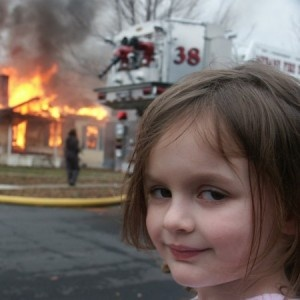

In [34]:
import cv2
from IPython.display import Image, display

# Load the image
image = cv2.imread('resource/dgirl_300.jpg')

# Display the image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes()))

### Flip X axis (0)

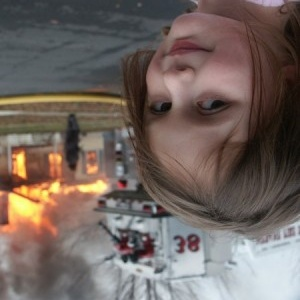

In [36]:
import cv2
from IPython.display import Image, display

# Load the image
image = cv2.imread('resource/dgirl_300.jpg')
image = cv2.flip(image,0)

# Display the image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes()))

In [ ]:
### Flip Y-axis (1)

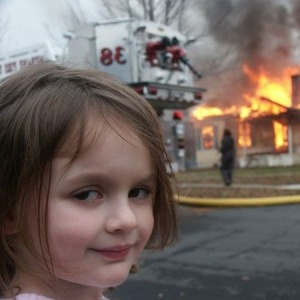

In [37]:
import cv2
from IPython.display import Image, display

# Load the image
image = cv2.imread('resource/dgirl_300.jpg')
image = cv2.flip(image,1)

# Display the image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes()))

### Flip both axes (-1)

Replace the `???` in the code below with the correct code to flip both axes

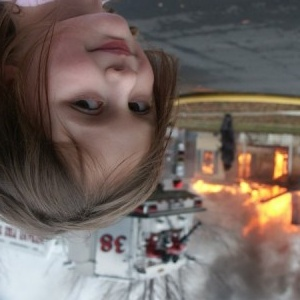

In [40]:
import cv2
from IPython.display import Image, display

# Load the image
image = cv2.imread('resource/dgirl_300.jpg')
image = cv2.flip(image, ???)

# Display the image
display(Image(data=cv2.imencode('.jpg', image)[1].tobytes()))

## Put text on the video

In [16]:
def putText(frame):
    # Define the text properties
    text = 'Your Annotation'
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_position = (50, 50)
    text_scale = 1
    text_color = (0, 255, 0)
    text_thickness = 2

    # Add text annotation on the frame
    cv2.putText(frame, text, text_position, font, text_scale, text_color, text_thickness)


In [22]:
# Stop button
# ================
stopButton = genStopButton()

# Display function
# ================
def view(button):
    cap = cv2.VideoCapture(0)

    width = 160
    height = 120
    fps=30
    
    # set the capture properties
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
    cap.set(cv2.CAP_PROP_FPS, 30)


    display_handle=display(None, display_id=True)
    i = 0
    while True:
        _, frame = cap.read()
        frame = cv2.flip(frame, 1) # if your camera reverses your image
        putText(frame)
        _, frame = cv2.imencode('.jpeg', frame)
        display_handle.update(Image(data=frame.tobytes()))
        if stopButton.value==True:
            cap.release()
            display_handle.update(None)


# Run
# ================
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

None